In [7]:
import pandas as pd
import json
import spacy
from dtm_toolkit.lucy import Lucy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from collections import Counter
import numpy as np
from operator import add
from pprint import pprint
STD_FIG_SIZE = (17,4)
# renewable subset
RENEWABLE_SUBSET = ["solar", "solar thermal", "wind", "wave", "hydro", "bio"]
# fossil fuels subset
FOSSIL_SUBSET = ["coal", "oil", "fossil gas"]
ET_COLOUR_MAPPING = {
    "coal": "black",
    "bio": "tomato",
    "oil": "gray",
    "ccs": "lightpink",
    "fossil gas": (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
    "hydro": "deepskyblue",
    "wave": "steelblue",
    "nuclear": (0.8, 0.47058823529411764, 0.7372549019607844),
    "solar": (0.9254901960784314, 0.8823529411764706, 0.2),
    "solar thermal": "darkkhaki",
    "wind": (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)
}
ORG_COLOUR_MAPPING = {
    "steo": "red",
    "ieo": "gold",
    "aeo": "deepskyblue",
    "tech_briefs": "forestgreen" 
}
ET_INDICES = ['fossil gas', 'coal', 'nuclear', 'oil', 'hydro', 'bio', 'wind', 'solar', 'solar thermal', 'ccs', 'wave']

plt_colours = {
    "coal": "black",
    "natural gas": (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
    "natural_gas": (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
    "wind & solar": (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
    "renewable": (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
    "solar": (0.9254901960784314, 0.8823529411764706, 0.2),
    "nuclear": (0.8, 0.47058823529411764, 0.7372549019607844)
}

In [8]:
lucy = Lucy()
def fill_null(counter_dict):
    for energy in lucy.energy_clusters.keys():
        if energy not in counter_dict.keys():
            counter_dict[energy] = 0
    return counter_dict

## Here we compute a couple of nice summary statistics for the IEO and AEO datasets.

In [3]:
sns.set_style("whitegrid")
sns.set_context("paper")
palette = sns.color_palette("viridis", as_cmap=True)

In [4]:
# load aeo, ieo dataframe
df = pd.read_pickle("lucy_greyroads.pickle")
# df = df[df['year']!='']
# df['year'] = df['year'].apply(lambda x: int(x))
only_ieo_aeo = df['doc_category'].apply(lambda x: x=="aeo" or x=="ieo")
aeo_ieo_df = df[only_ieo_aeo]
aeo_ieo_df = DataFrameCreator.annotate_year("doc_year_map.json", df)
# load journals dataframe
journals_df = pd.read_pickle("lucy_journals.pickle")
journals_df = journals_df[journals_df['year']>1996]
journals_df = journals_df[journals_df['year']<2021]
coal_df = pd.read_pickle("lucy_journals_coal.pickle")
solar_df = pd.read_pickle("lucy_journals_solar.pickle")
biofuels_df = pd.read_pickle("lucy_journals_biofuels.pickle")

In [5]:
journals_df[journals_df['journal']=="Energy Policy"].groupby('year').count()

,title,doc_type,journal,date,subjects,authors,section_txt,doi,scopus_eid,eid,debug_ID,toc1,X,lucy_counts,lucy_terms
year,,,,,,,,,,,,,,,
1997,89,89,89,89,82,89,89,89,89,89,89,89,0,89,89
1998,88,88,88,88,72,88,88,88,88,88,88,88,0,88,88
1999,67,67,67,67,55,67,67,67,67,67,67,67,0,67,67
2000,90,90,90,90,75,90,90,90,90,90,90,90,0,90,90
2001,109,109,109,109,96,109,109,109,109,109,109,109,0,109,109
2002,114,114,114,114,105,114,114,114,114,114,114,114,0,114,114
2003,128,128,128,128,115,128,128,128,128,128,128,128,0,128,128
2004,155,155,155,155,149,155,155,155,155,155,155,155,0,155,155
2005,181,181,181,181,175,181,181,181,181,181,181,181,0,181,181


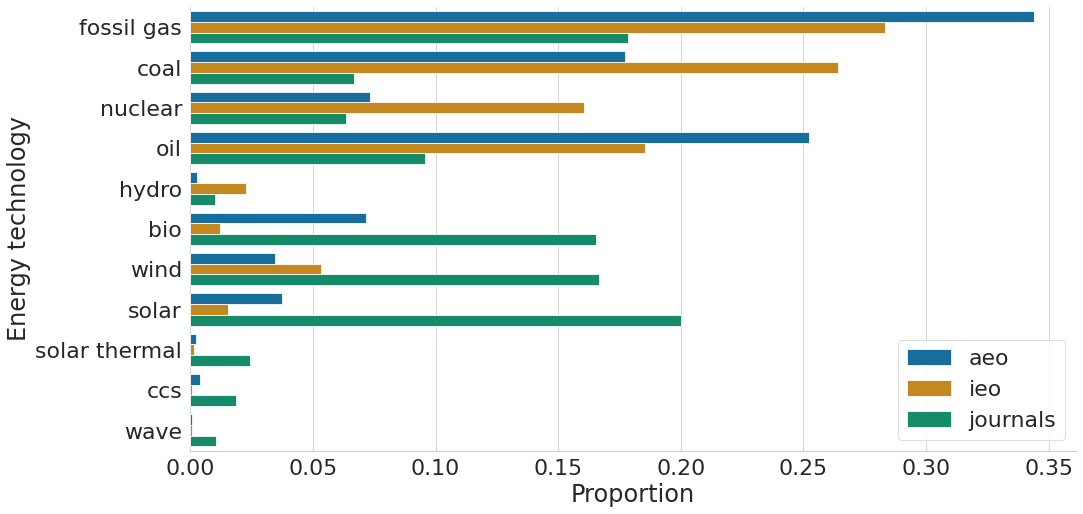

In [15]:
palette = sns.color_palette("colorblind")
sns.set_theme(
    palette=palette, 
    style={'axes.spines.bottom': True,
            'axes.grid':True,
            'axes.spines.left': False,
            'axes.spines.right': False,
            'axes.spines.top': False,
            'ytick.left': False,
            'figure.facecolor':'w'}, 
    context="paper",
    font_scale=2.5
)
from collections import defaultdict
res = aeo_ieo_df.groupby("doc_category")['lucy_counts'].aggregate(lambda x: sum(x, Counter()))
jres = journals_df['lucy_counts'].aggregate(lambda x: sum(x, Counter()))
df_list = []
aeo_total = sum(res['aeo'].values())
ieo_total = sum(res['ieo'].values())
journals_total = sum(jres.values())
journals = [["journals", i, jres[i] / journals_total] for i in ET_INDICES]
aeo = [["aeo", i, res['aeo'][i] / aeo_total] for i in ET_INDICES]
ieo = [["ieo", i, res['ieo'][i] / ieo_total] for i in ET_INDICES]
df_list.extend(aeo)
df_list.extend(ieo)
df_list.extend(journals)
# plt.tight_layout()
plot_df = pd.DataFrame(data=df_list, columns=["publication", "Energy technology", "Proportion"])
fig = plt.figure(figsize=(15,7))
g = sns.barplot(data=plot_df, palette="colorblind", hue="publication", y="Energy technology", x="Proportion")
# g.set(title="Proportion of Energy Technology Discussion by Publication")
plt.legend(loc='lower right')
plt.subplots_adjust(left=0.18, bottom=0.12, top=1, right=1)
plt.savefig("./figures/et_discussion_all.png")

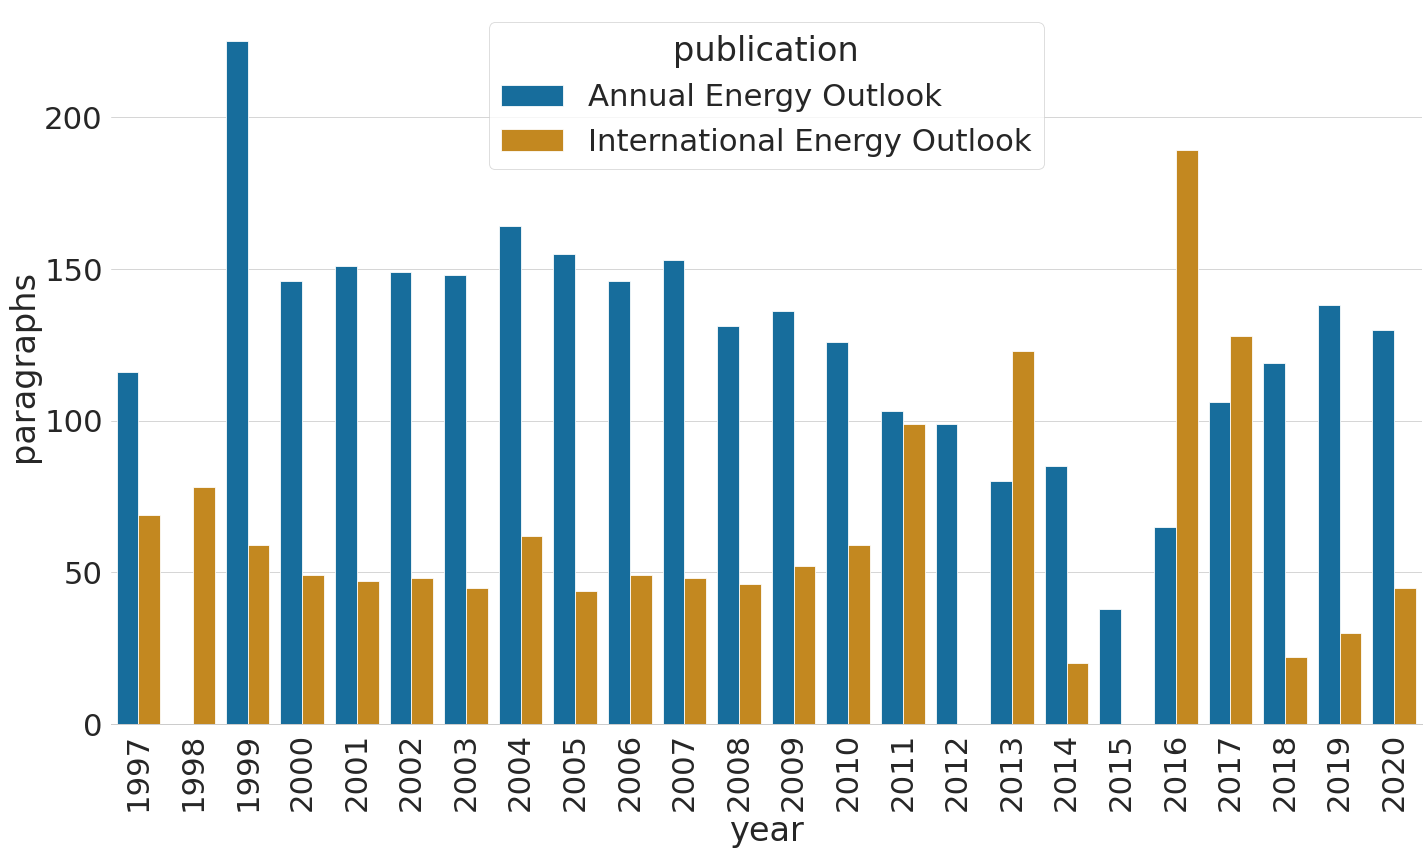

In [7]:
palette = sns.color_palette("colorblind")
sns.set_theme(
    palette=palette, 
    style={'axes.spines.bottom': True,
            'axes.grid':True,
            'axes.spines.left': False,
            'axes.spines.right': False,
            'axes.spines.top': False,
            'ytick.left': False,
            'figure.facecolor':'w'}, 
    context="paper",
    font_scale=3.5
)
aeo = aeo_ieo_df[aeo_ieo_df['doc_category']=="aeo"].groupby('year')['lucy_counts'].count()
ieo = aeo_ieo_df[aeo_ieo_df['doc_category']=="ieo"].groupby('year')['lucy_counts'].count()
ieo_years = ieo.index.tolist()
aeo_years = aeo.index.tolist()
years = sorted(set(ieo_years + aeo_years), key=lambda x: int(x))
data = []
aeo = aeo.to_dict()
ieo = ieo.to_dict()
for year in years:
    try:
        data.append([year, 'Annual Energy Outlook', aeo[year]])
    except:
        pass
    try:
        data.append([year, 'International Energy Outlook', ieo[year]])
    except:
        pass
plot_df = data=pd.DataFrame(data=data, columns=['year', 'publication', 'paragraphs'])
plot_df
fig = plt.figure(figsize=(20,12))

g = sns.barplot(data=plot_df, palette="colorblind", x="year", y="paragraphs", hue="publication")
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.07, bottom=0.15, top=0.98, right=0.98)
plt.savefig("./figures/aeo_ieo_docs_ot.png")

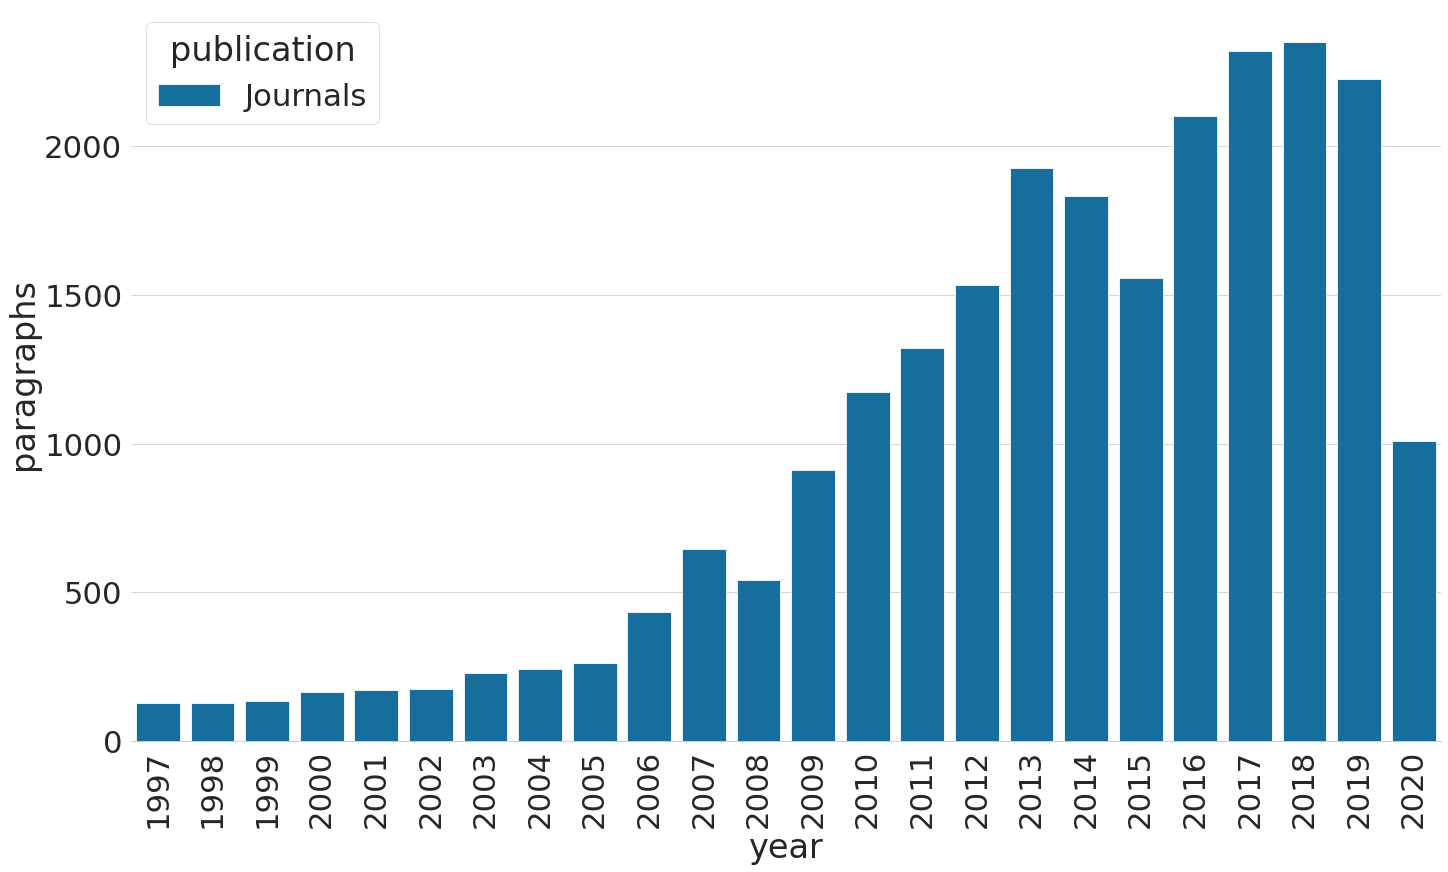

In [16]:
palette = sns.color_palette("colorblind")
sns.set_theme(
    palette=palette, 
    style={'axes.spines.bottom': True,
            'axes.grid':True,
            'axes.spines.left': False,
            'axes.spines.right': False,
            'axes.spines.top': False,
            'ytick.left': False,
            'figure.facecolor':'w'}, 
    context="paper",
    font_scale=3.5
)
journals = journals_df.groupby('year')['lucy_counts'].count()
coal = coal_df.groupby('year')['lucy_counts'].count()
solar = solar_df.groupby('year')['lucy_counts'].count()
biofuels = biofuels_df.groupby('year')['lucy_counts'].count()
journals_years = journals.index.tolist()
coal_years = coal.index.tolist()
solar_years = solar.index.tolist()
biofuels_years = biofuels.index.tolist()
years = sorted(set(journals_years + coal_years + solar_years + biofuels_years), key=lambda x: int(x))
data = []
journals = journals.to_dict()
coal = coal.to_dict()
solar = solar.to_dict()
biofuels = biofuels.to_dict()
for year in years:
    try:
        data.append([year, 'Journals', journals[year]])
    except:
        pass
#     try:
#         data.append([year, 'journals - coal', coal[year]])
#     except:
#         pass
#     try:
#         data.append([year, 'journals - solar', solar[year]])
#     except:
#         pass
#     try:
#         data.append([year, 'journals - biofuels', biofuels[year]])
#     except:
#         pass
plot_df = data=pd.DataFrame(data=data, columns=['year', 'publication', 'paragraphs'])
plot_df
fig = plt.figure(figsize=(20,12))

g = sns.barplot(data=plot_df, palette="colorblind", x="year", y="paragraphs", hue="publication")
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.09, bottom=0.15, top=1, right=1)
plt.savefig("./figures/journals_abstract_all_corpora.png")

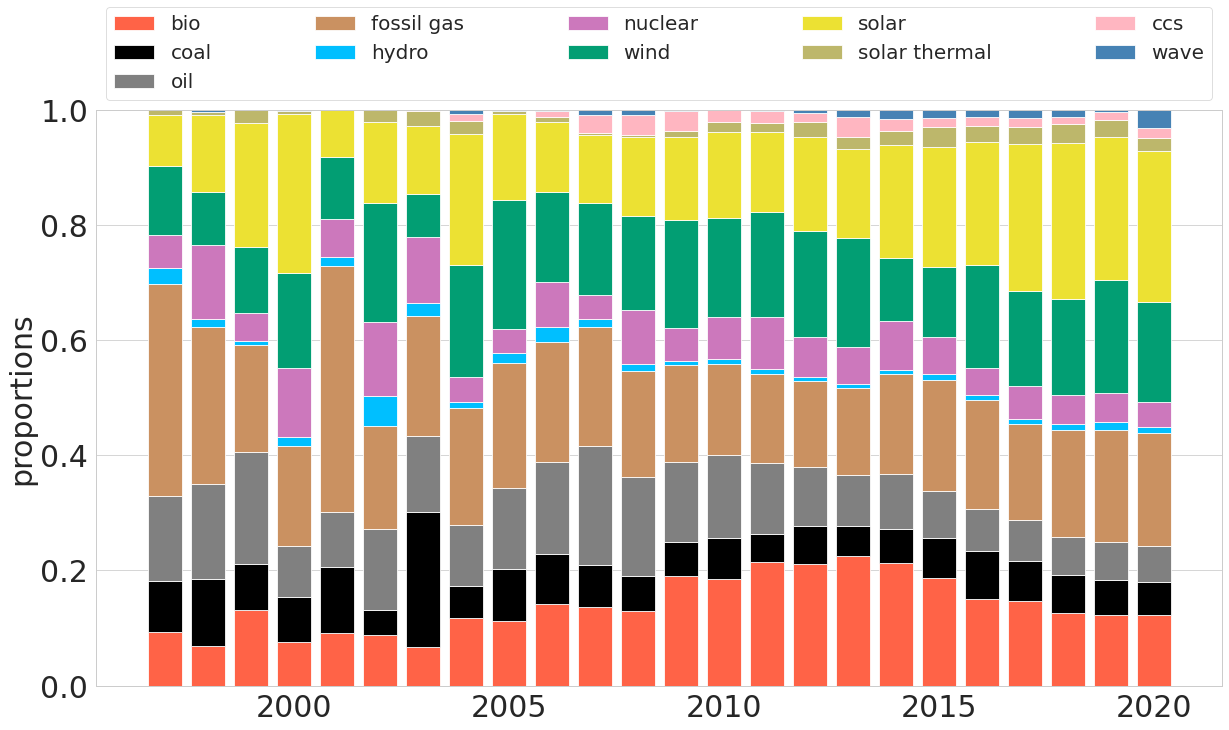

In [74]:
FONTSIZE = 30

def create_subset_stacked_bar(dataset, subset=[]):
    fig, ax = plt.subplots(figsize=(17,10))
    final_data = {}
    for year, data in dataset.items():
        fill_null(data)
        total = sum(data.values())
        for et in data:
            if (subset == []) or (et in subset):
                if et not in final_data:
                    final_data[et] = []
                final_data[et].append(data[et] / total)
    prev_dataset = None
    for i, (key, values) in enumerate(final_data.items()):
        ax.bar(labels, values, label=key, bottom=prev_dataset, color=ET_COLOUR_MAPPING[key])
        ax.set_ylabel('proportions', fontsize=FONTSIZE)
#         ax.set_title(f'Discussion on ETs by year - {PUBLICATION}')
        ax.legend(fontsize=20, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=5)
        if not prev_dataset:
            prev_dataset = values
        else:
            prev_dataset = list( map( add, prev_dataset, values))
    plt.xticks(fontsize=FONTSIZE)
    plt.yticks(fontsize=FONTSIZE)
    return plt
PUBLICATION = "ieo"
palette = sns.color_palette("colorblind")
d1 = lucy.get_energy_count_by_x(journals_df, groupby="year", column="lucy_counts")
d1 = d1.drop(2021, axis=0)
labels = [year for year in d1.keys()]
plt = create_subset_stacked_bar(d1)
plt.subplots_adjust(bottom=0.05,top=0.85, left=0.07, right=0.99)
plt.savefig("./figures/lucy/journals_lucy_proportions_ot.png")

# In this section I want to be able to explore a DTM and plot words from certain topics over time.

In [9]:
from dtm_toolkit.dtm.analysis import DTMAnalysis
import os
NDOCS = 2446
NTOPICS = 30

aeo_analysis = DTMAnalysis(
        2686, 
        NTOPICS,
        model_root="../../static/analysis/aeo_min_freq_40_1997_2020_ngram/",
        doc_year_map_file_name="model-year.dat",
        seq_dat_file_name="model-seq.dat",
        vocab_file_name="vocab.txt",
        model_out_dir="model_k30_a0.01_var0.05",
        )
ieo_analysis = DTMAnalysis(
        1305, 
        NTOPICS,
        model_root="../../static/analysis/ieo_min_freq_40_1997_2020_ngram/",
        doc_year_map_file_name="model-year.dat",
        seq_dat_file_name="model-seq.dat",
        vocab_file_name="vocab.txt",
        model_out_dir="model_k30_a0.01_var0.05",
        )

journals_all_analysis = DTMAnalysis(
        23499,
        NTOPICS,
        model_root="../../static/analysis/journal_energy_policy_applied_energy_1997_2020_abstract_all_ngram_min_freq_150",
        doc_year_map_file_name="model-year.dat",
        seq_dat_file_name="model-seq.dat",
        vocab_file_name="vocab.txt",
        model_out_dir="k30_a0.01_var0.05",
        )

Initialising EuroVoc...


<Figure size 432x288 with 0 Axes>

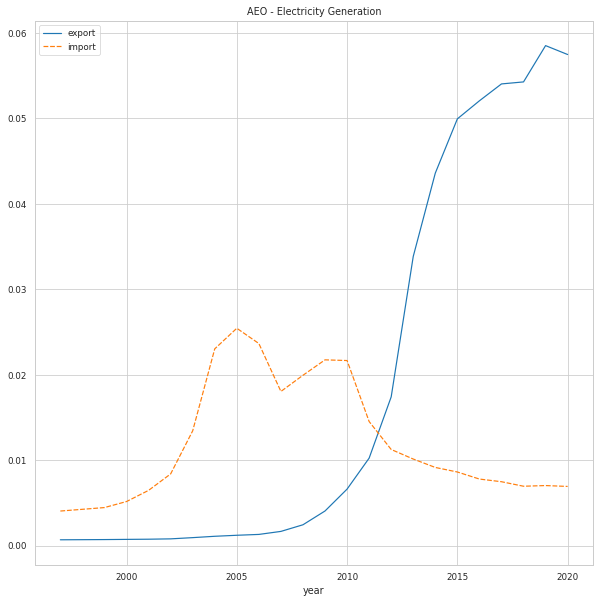

In [13]:
aeo_plt = aeo_analysis.plot_words_ot_from_topic(8, ['export', 'import'], "AEO - Electricity Generation")

In [5]:
aeo_plt30 = aeo_analysis.plot_labels_ot_from_topic(1, ["6626 renewable energy", "6616 oil and gas industry", "6406 production"], "hello", n=30)
aeo_plt10 = aeo_analysis.plot_labels_ot_from_topic(1, ["6626 renewable energy", "6616 oil and gas industry", "6406 production"], "hello", n=10)
aeo_plt100 = aeo_analysis.plot_labels_ot_from_topic(1, ["6626 renewable energy", "6616 oil and gas industry", "6406 production"], "hello", n=100)

Initialising EuroVoc...
Initialising gloVe embeddings...


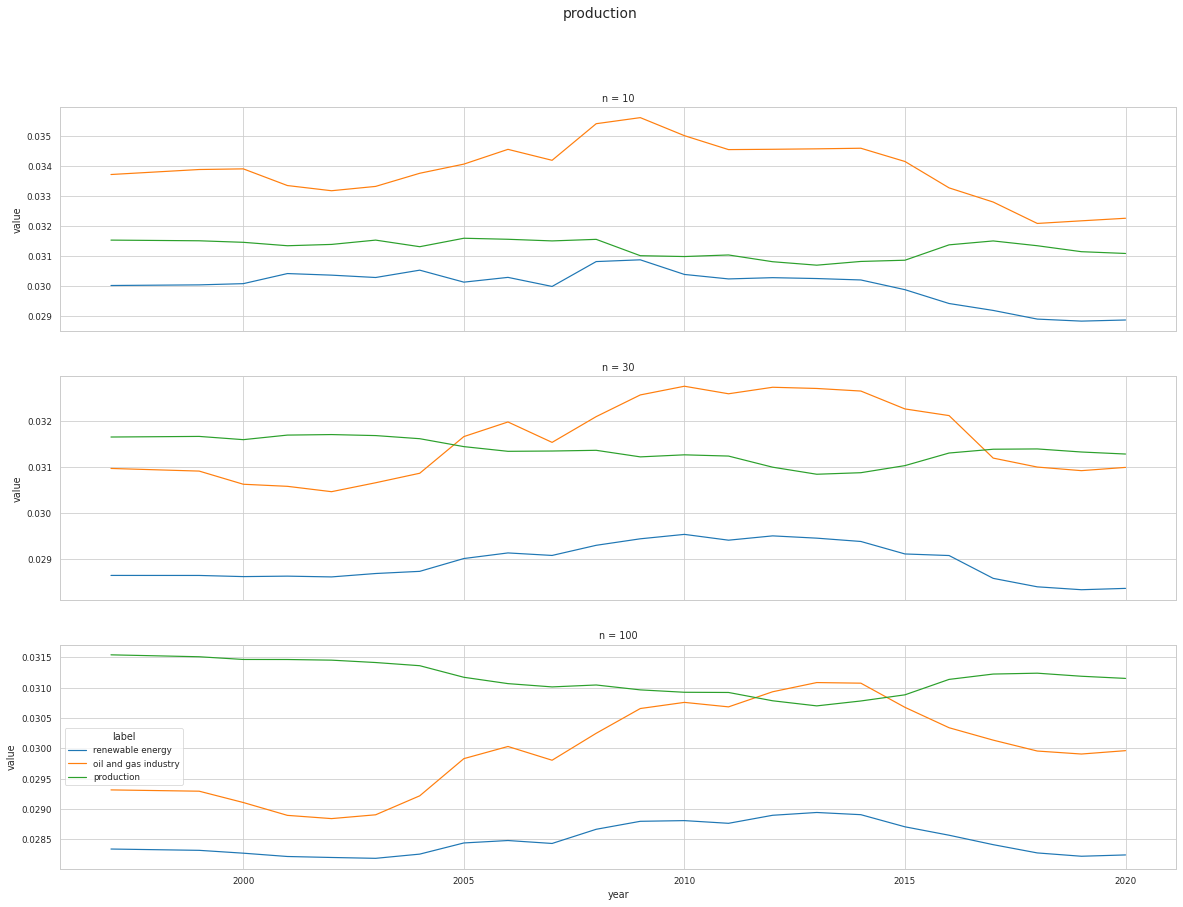

In [6]:
fig, axs = plt.subplots(3,1, figsize=(20, 14), sharex=True)
sns.lineplot(data=aeo_plt10, x="year", y="value", hue="label", ax=axs[0]).set_title("n = 10")
sns.lineplot(data=aeo_plt30, x="year", y="value", hue="label", ax=axs[1]).set_title("n = 30")
sns.lineplot(data=aeo_plt100, x="year", y="value", hue="label", ax=axs[2]).set_title("n = 100")
axs[0].legend().set_visible(False)
axs[1].legend().set_visible(False)
# axs[2].legend().set_visible(False)
fig.suptitle("production", fontsize='x-large')
fig.savefig("../ALTA_results/labels_over_time/aeo_topic0_labels_over_time.png")

<Figure size 432x288 with 0 Axes>

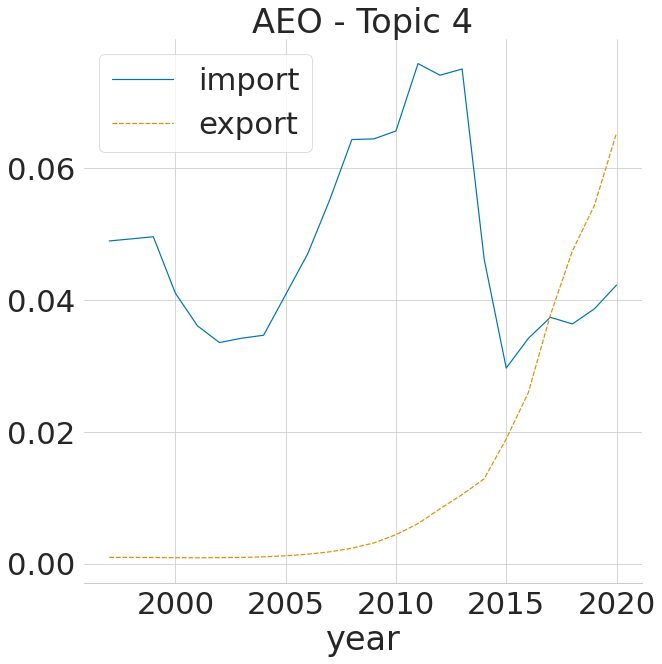

In [12]:
aeo_plt = aeo_analysis.plot_words_ot_from_topic(6, ['import', 'export'], "AEO - Topic 4")

<Figure size 432x288 with 0 Axes>

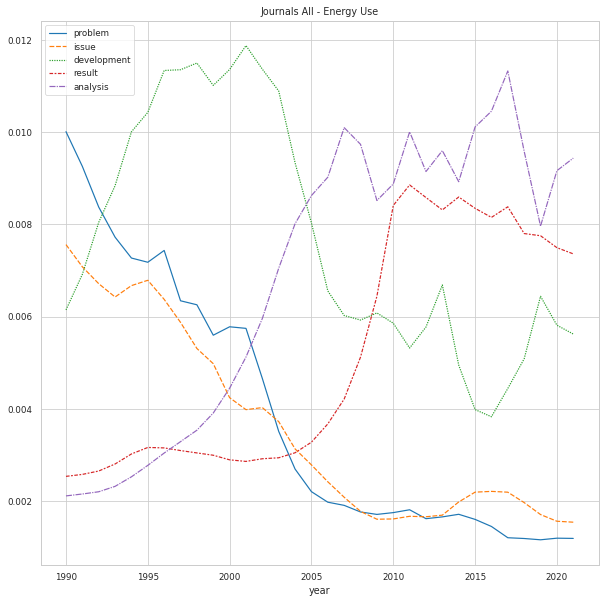

In [10]:
journals_plt = journals_all_analysis.plot_words_from_topic(0, ['problem', 'issue', 'development', 'result', 'analysis'], "Journals All - Energy Use")

<Figure size 432x288 with 0 Axes>

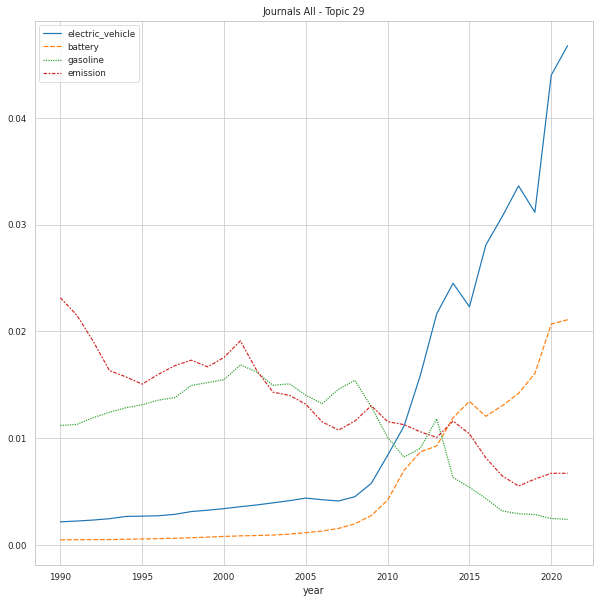

In [44]:
journals_plt = journals_all_analysis.plot_words_from_topic(29, ['electric_vehicle', 'battery', 'gasoline', 'emission'], "Journals All - Topic 29")

<Figure size 432x288 with 0 Axes>

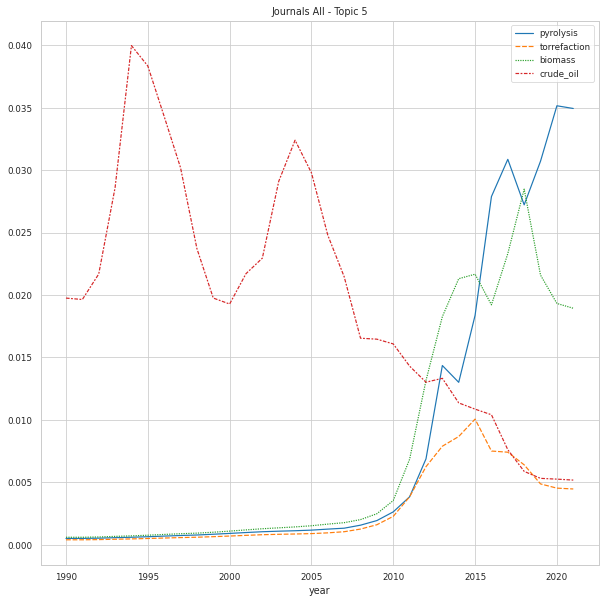

In [12]:
journals_plt = journals_all_analysis.plot_words_from_topic(5, ['pyrolysis', 'torrefaction', 'biomass', 'crude_oil'], "Journals All - Topic 5")

<Figure size 432x288 with 0 Axes>

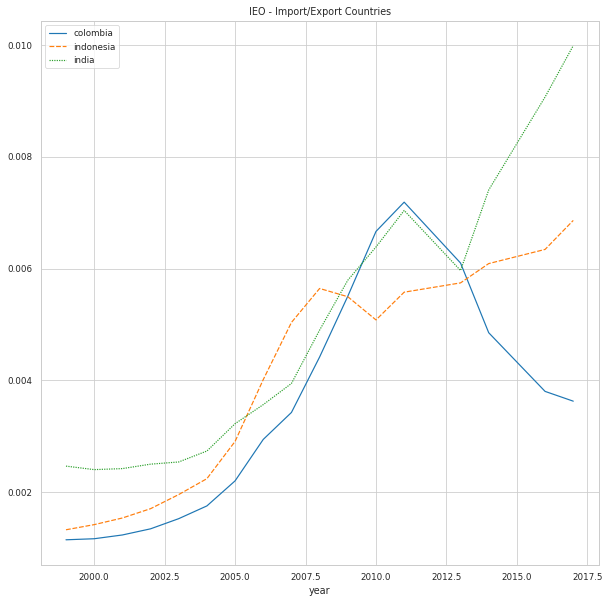

In [15]:
journals_plt = ieo_analysis.plot_words_from_topic(9, ['colombia', 'indonesia', 'india'], "IEO - Import/Export Countries", "./figures/ieo_import_export.png")

In [53]:
journals_plt = journals_all_analysis.plot_words_from_topic(8, ['application', 'production', 'performance', 'study', 'result'], "Journals All - Topic 13", save_path="./figures/word_plot_journals_all_emissions_topic.png")

AttributeError: 'DTMAnalysis' object has no attribute 'plot_words_from_topic'

<Figure size 432x288 with 0 Axes>

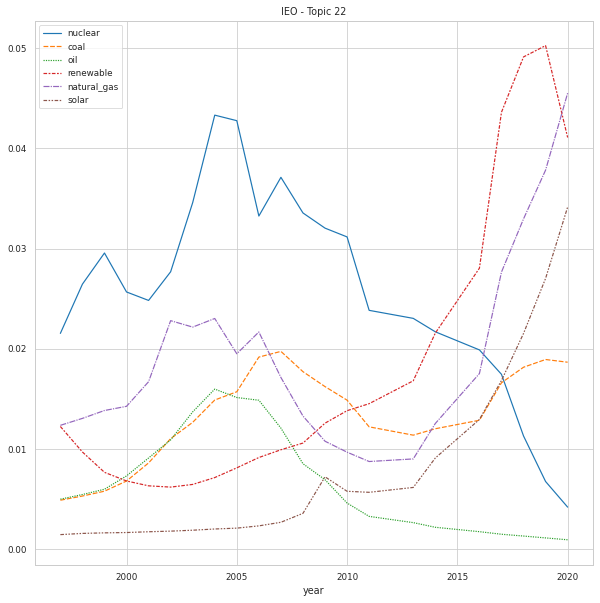

In [19]:
ieo_plt = ieo_analysis.plot_words_from_topic(27, ['nuclear', 'coal', 'oil', 'renewable', 'natural_gas', 'solar'], "IEO - Topic 22", save_path="./figures/word_plot_ieo_emissions_topic.png")

In [3]:
# tns = ieo_analysis.get_topic_names(raw=True, _type="embedding")
tws = journals_all_analysis.get_words_for_topics(n=20)

In [4]:
tws

[[(0.2244696457096485, 'power'),
  (0.1925440240681947, 'system'),
  (0.09372990962260482, 'heat'),
  (0.05761369586853014, 'generation'),
  (0.05126718115279581, 'electricity'),
  (0.045519477064494406, 'chp'),
  (0.04016002250831713, 'energy'),
  (0.03318252423899802, 'electric'),
  (0.03155570867219123, 'district_heating'),
  (0.027377276967182743, 'electrical'),
  (0.024341926929706593, 'output'),
  (0.022368371899689737, 'generator'),
  (0.021281574498927338, 'efficiency'),
  (0.020049767174874625, 'heating'),
  (0.019986723928683326, 'supply'),
  (0.019762640286184664, 'thermoelectric'),
  (0.019620596133982284, 'cogeneration'),
  (0.018489479899049997, 'produce'),
  (0.01847454802495808, 'source'),
  (0.018204905350985793, 'base')],
 [(0.23209445568216075, 'fuel'),
  (0.09046268115602782, 'biofuel'),
  (0.08247895735114329, 'ethanol'),
  (0.06729542571672661, 'production'),
  (0.04978304760873769, 'transport'),
  (0.04844956575905096, 'biodiesel'),
  (0.045510384311837196, 'oil'

In [85]:
print("; ".join([x for _,x in tws[27]]))

plant; coal; gas; power_plant; cycle; natural_gas; process; technology; cost; fire; steam; fuel; boiler; efficiency; turbine; ccs; capture; base; system; combine


In [28]:
ieo_plt30 = ieo_analysis.plot_labels_ot_from_topic(15, ["7226 asia and oceania", "6616 oil and gas industry", "6406 production"], "hello", n=30)
ieo_plt10 = ieo_analysis.plot_labels_ot_from_topic(15, ["7226 asia and oceania", "6616 oil and gas industry", "6406 production"], "hello", n=10)
ieo_plt100 = ieo_analysis.plot_labels_ot_from_topic(15, ["7226 asia and oceania", "6616 oil and gas industry", "6406 production"], "hello", n=100)

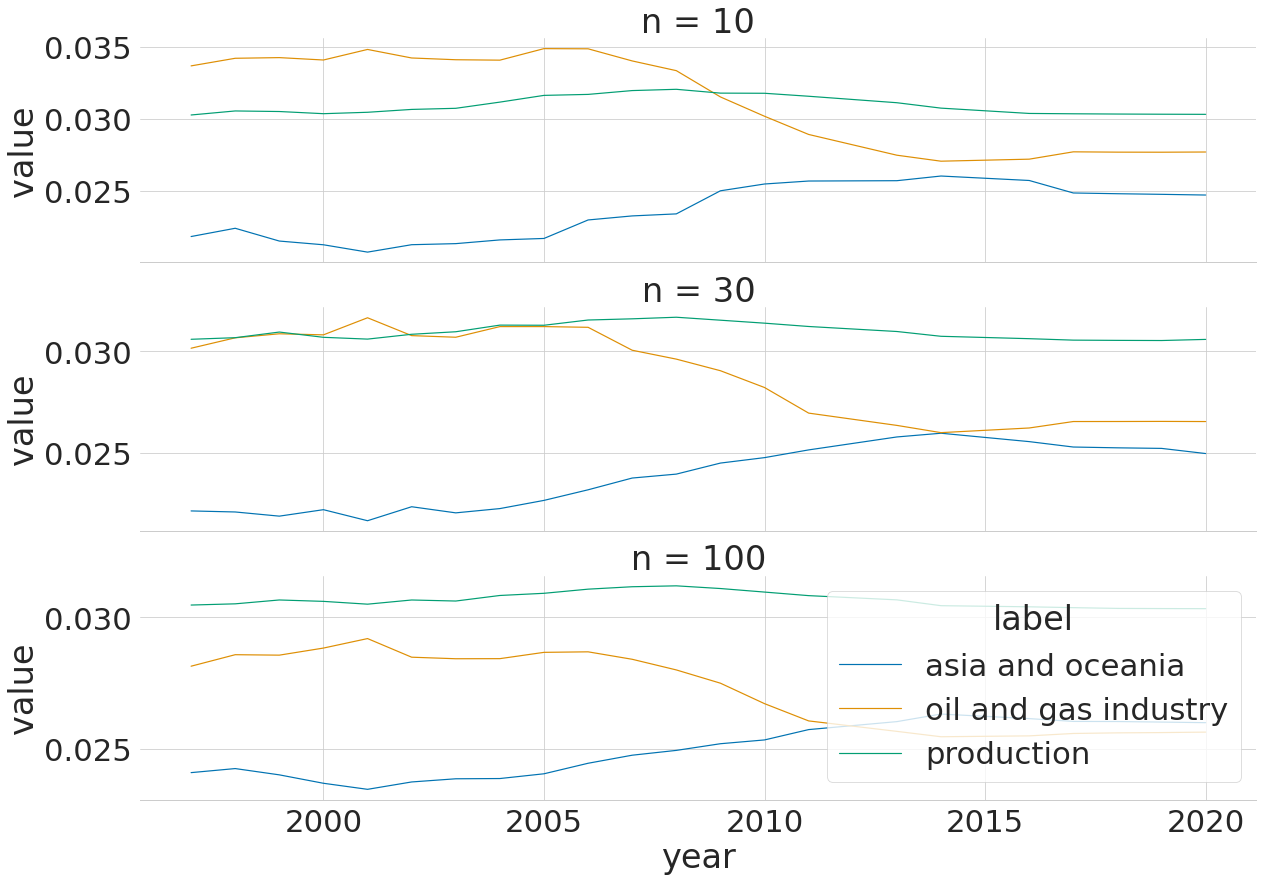

In [29]:
fig, axs = plt.subplots(3,1, figsize=(20, 14), sharex=True)
sns.lineplot(data=ieo_plt10, x="year", y="value", hue="label", ax=axs[0]).set_title("n = 10")
sns.lineplot(data=ieo_plt30, x="year", y="value", hue="label", ax=axs[1]).set_title("n = 30")
sns.lineplot(data=ieo_plt100, x="year", y="value", hue="label", ax=axs[2]).set_title("n = 100")
axs[0].legend().set_visible(False)
axs[1].legend().set_visible(False)
# axs[2].legend().set_visible(False)
fig.savefig("./figures/labels_over_time/ieo_topic15_labels_over_time.png")

In [127]:
journal_plt30 = journals_all_analysis.plot_labels_ot_from_topic(0, ["6626 renewable energy", "6821 mechanical engineering", "6826 electronics and electrical engineering"], "hello", n=30)
journal_plt10 = journals_all_analysis.plot_labels_ot_from_topic(0, ["6626 renewable energy", "6821 mechanical engineering", "6826 electronics and electrical engineering"], "hello", n=10)
journal_plt100 = journals_all_analysis.plot_labels_ot_from_topic(0, ["6626 renewable energy", "6821 mechanical engineering", "6826 electronics and electrical engineering"], "hello", n=100)

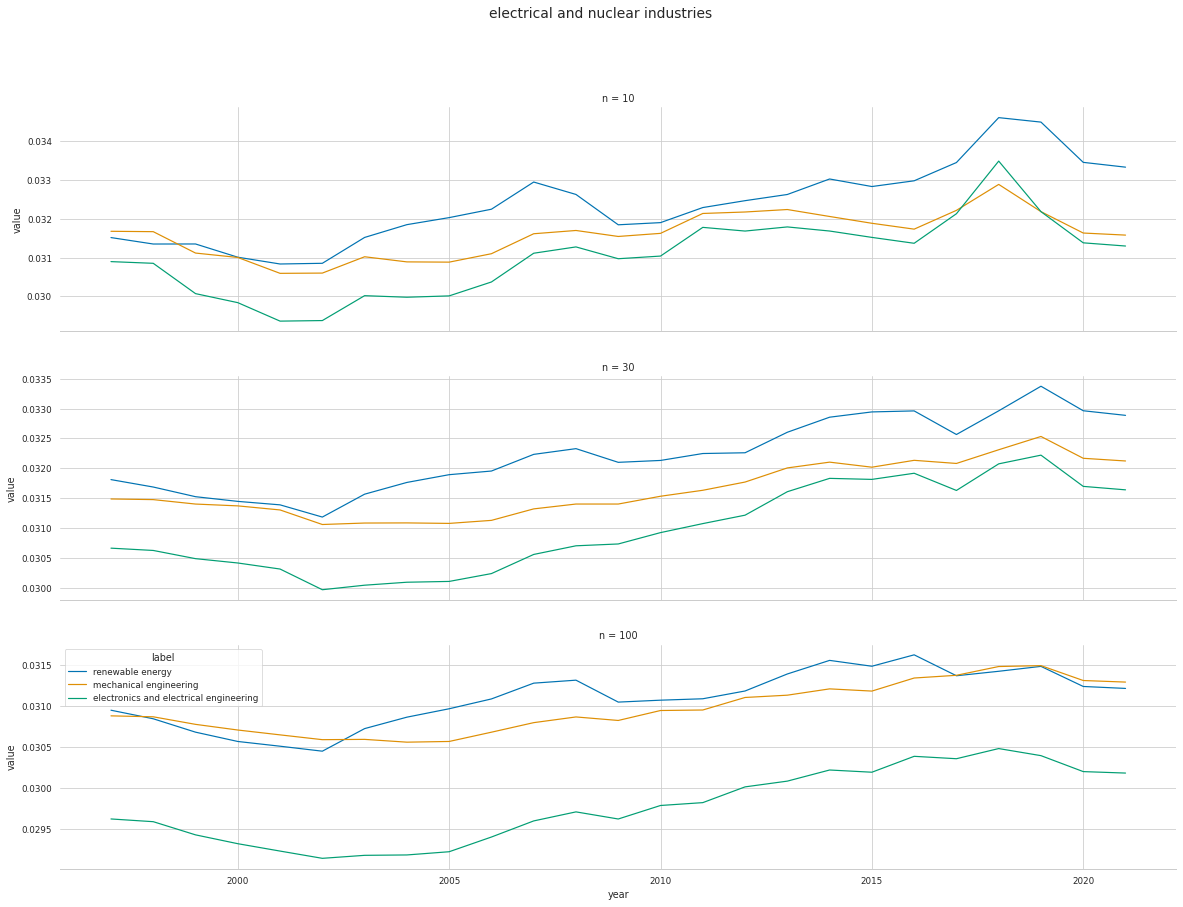

In [128]:
fig, axs = plt.subplots(3,1, figsize=(20, 14), sharex=True)
fig.suptitle("electrical and nuclear industries", fontsize='x-large')
sns.lineplot(data=journal_plt10, x="year", y="value", hue="label", ax=axs[0]).set_title("n = 10")
sns.lineplot(data=journal_plt30, x="year", y="value", hue="label", ax=axs[1]).set_title("n = 30")
sns.lineplot(data=journal_plt100, x="year", y="value", hue="label", ax=axs[2]).set_title("n = 100")
axs[0].legend().set_visible(False)
axs[1].legend().set_visible(False)
# axs[2].legend().set_visible(False)
# fig.savefig("../ALTA_results/labels_over_time/journals_topic27_labels_over_time.png")

In [64]:
journal_plt30 = journals_all_analysis.plot_labels_ot_from_topic(8, ["6406 production", "6416 research and intellectual property"], "hello", n=30)
journal_plt10 = journals_all_analysis.plot_labels_ot_from_topic(8, ["6406 production", "6826 electronics and electrical engineering", "6411 technology and technical regulations", "6416 research and intellectual property"], "hello", n=10)
journal_plt100 = journals_all_analysis.plot_labels_ot_from_topic(8, ["6406 production", "6826 electronics and electrical engineering", "6411 technology and technical regulations", "6416 research and intellectual property"], "hello", n=100)

In [68]:
tns = journals_all_analysis.get_topic_names(_type="embedding", raw=True)

In [70]:
tns[3].most_common()

[('6406 production', 0.8917616605758667),
 ('4026 accounting', 0.8828442692756653),
 ('2451 prices', 0.8711508512496948),
 ('2016 business operations and trade', 0.861099362373352),
 ('2446 taxation', 0.8576613664627075),
 ('4811 organisation of transport', 0.8375048637390137),
 ('2031 marketing', 0.8302441835403442),
 ('5206 environmental policy', 0.8292026519775391),
 ('2036 distributive trades', 0.8050455451011658),
 ('6626 renewable energy', 0.8025460839271545),
 ('6821 mechanical engineering', 0.8016403317451477),
 ('1611 economic conditions', 0.8000273704528809),
 ('6411 technology and technical regulations', 0.7780962586402893),
 ('6831 building and public works', 0.766861081123352),
 ('6616 oil and gas industry', 0.7631506323814392),
 ('5216 deterioration of the environment', 0.7457849383354187),
 ('6621 electrical and nuclear industries', 0.7274596095085144),
 ('6826 electronics and electrical engineering', 0.7243828177452087),
 ('6416 research and intellectual property', 0.72

In [65]:
journal_plt10 = journal_plt10[journal_plt10['year']!=2021]

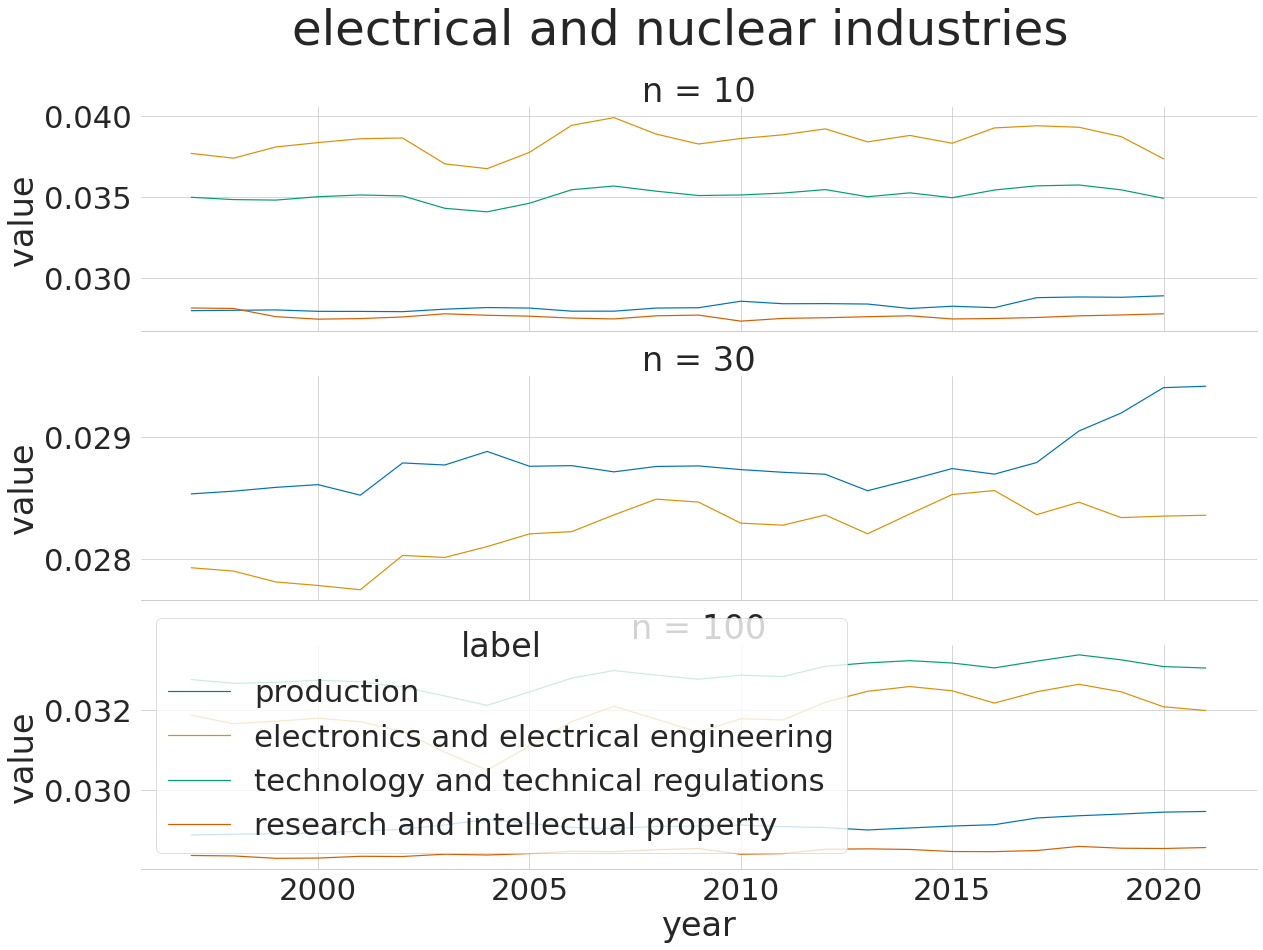

In [66]:
fig, axs = plt.subplots(3,1, figsize=(20, 14), sharex=True)
fig.suptitle("electrical and nuclear industries", fontsize='x-large')
sns.lineplot(data=journal_plt10, x="year", y="value", hue="label", ax=axs[0]).set_title("n = 10")
sns.lineplot(data=journal_plt30, x="year", y="value", hue="label", ax=axs[1]).set_title("n = 30")
sns.lineplot(data=journal_plt100, x="year", y="value", hue="label", ax=axs[2]).set_title("n = 100")
axs[0].legend().set_visible(False)
axs[1].legend().set_visible(False)
# axs[2].legend().set_visible(False)
# fig.savefig("../ALTA_results/labels_over_time/journals_topic27_labels_over_time.png")

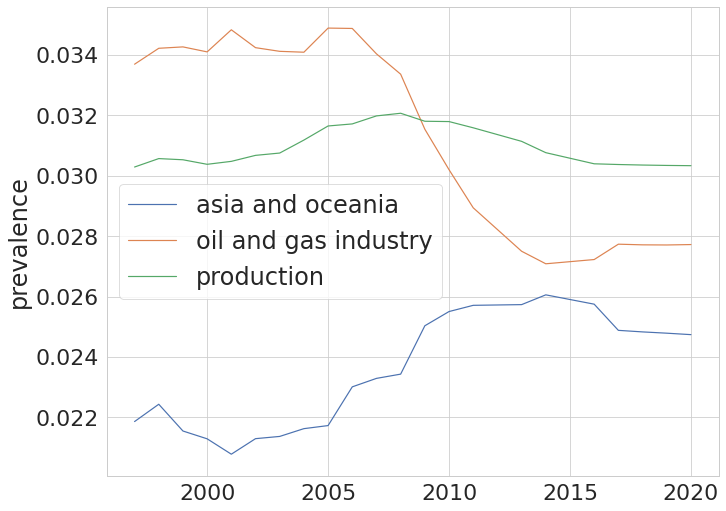

In [30]:
fig = plt.figure(figsize=(10, 7))
# fig.suptitle("Topic 27 - renewable energy", fontsize='x-large')
sns.set_theme(font_scale=2.5, style="whitegrid", context="paper")
# sns.set_style("whitegrid")
# sns.set_context("paper")
sns.lineplot(data=ieo_plt10, x="year", y="value", hue="label")
ax = fig.get_axes()[0]
ax.legend(fontsize="medium")
ax.set_ylabel("prevalence")
ax.set_xlabel(None)
plt.subplots_adjust(left=0.14, bottom=0.06, right=0.99, top=0.99)
fig.savefig("./figures/labels_over_time/ieo_topic15_labels_over_time.png")

<Figure size 432x288 with 0 Axes>

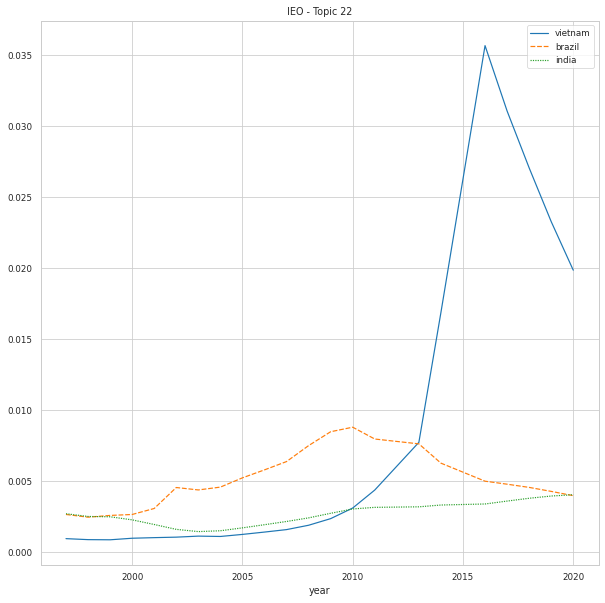

In [13]:
ieo_plt = ieo_analysis.plot_words_ot_from_topic(3, ['vietnam', 'brazil'], "IEO - Topic 22", save_path="./figures/word_plot_ieo_emissions_topic.png")

<Figure size 432x288 with 0 Axes>

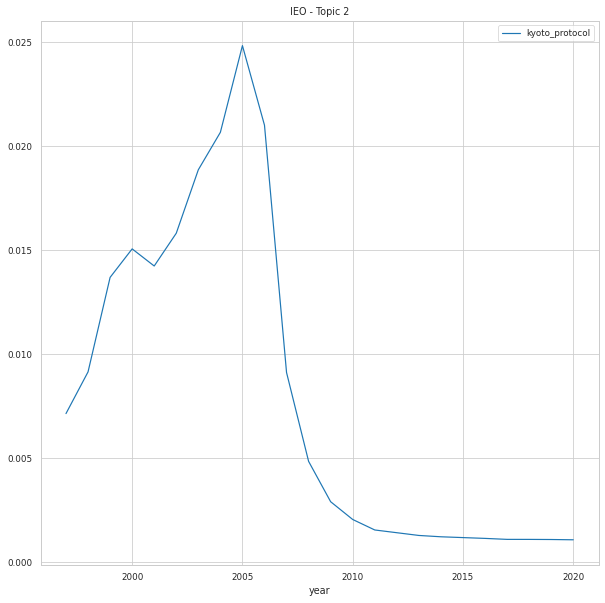

In [9]:
ieo_plt = ieo_analysis.plot_words_ot_from_topic(20, ['kyoto_protocol'], "IEO - Topic 2", save_path="./figures/word_plot_ieo_emissions_topic.png")

In [25]:
def get_words_from_topic_df(topic_idx, words):
    word_indexes = []
    for word in words:
        ind = ieo_analysis.vocab.index(word)
        assert ieo_analysis.vocab[ind] == word
        word_indexes.append(ind)
    topic_word_distribution = ieo_analysis.get_topic_word_distributions_ot(topic_idx)
    word_ot = topic_word_distribution[:, word_indexes]
    plot_df = pd.DataFrame(word_ot, columns=words)
    plot_df['year'] = ieo_analysis.years
    plot_df = plot_df.set_index('year')
    return plot_df

words_df = get_words_from_topic_df(11, ['export', 'production', 'import'])
df_scores = ieo_analysis.create_plottable_topic_proportion_ot_df(include_names=False)
for i in df_scores.index:
    df_scores.loc[i] = df_scores.loc[i] / df_scores.loc[i].sum() * 100

In [26]:
proportion_df = df_scores.loc[:,'11']

In [27]:
words_df['_prop'] = proportion_df

In [7]:
import matplotlib.pyplot as plt
def plot_word_ot_with_proportion(df, title, subfig=None, save_path=None):
    """This function should plot words over time for a particular topic in a DTM with
    that topic's proportional relevance underneath it. We also want to be able to 
    plot multiple of these in subplots.

    Args:
        df ([type]): The dataframe containing the relevant over time data, similar to plot_word_ot, as well
        as a column outlining the proportional relevance of the topic over time. These two sets of data should have the same time range.
        title ([type]): [description]
        save_path ([type], optional): [description]. Defaults to None.
    """
    if subfig:
        plotter = subfig
    else:
        plotter = plt
    fig, (ax0, ax1) = plotter.subplots(2,1, figsize=(5,7), sharex=True, gridspec_kw={'height_ratios': [4,1]})
    word_df = df.drop('_prop', axis='columns')
    prop_df = df['_prop']
    sns.set_theme(font_scale=2.5, style="whitegrid", context="paper")
    sns.lineplot(data=word_df, ax=ax0)
#     sns.move_legend(ax0, "upper left", bbox_to_anchor=(1,1))
    plot_one_time_evolution(prop_df, ax1)
    
def plot_one_time_evolution(df, ax):
    sns.set_context("talk")
    sns.set_style("ticks")
    sns.set_style({'axes.spines.bottom': True,
                'axes.grid':False,
                'axes.spines.left': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'ytick.left': False,
                'figure.facecolor':'w'})
    ax.set_yticks([])
    x_domain = [x for x in range(1,len(df)+1)]
    x_labels = df.index.tolist()
    _max = max(df)
    assert len(x_domain) == len(x_labels)
#     plotter.set_xticks(x_domain)
#     plotter.set_xticklabels(x_labels)
#     max_val = 1 * df.max() + 5
    ax.fill_between(x_labels, df, -1*df, label="sup")

In [5]:
from DTM.dtm.visualisation import plot_word_topic_evolution_ot
# aeo_topic0_df = aeo_analysis.plot_words_ot_from_topic(0, ['coal', 'natural_gas', 'renewable', 'solar'], None, plot=False)
aeo_topic8_df = aeo_analysis.plot_words_ot_from_topic(8, ['import', 'export'], None, plot=False)
# aeo_topic22_df = aeo_analysis.plot_words_ot_from_topic(22, ['solar', 'wind', 'tax_credit'], None, plot=False)
# aeo_topic26_df = aeo_analysis.plot_words_ot_from_topic(26, ['cpp', 'cair'], None, plot=False)
# ieo_topic14_df = ieo_analysis.plot_words_ot_from_topic(14, ['new', 'construction', 'plan', 'safety'], None, plot=False)
# ieo_topic27_df = ieo_analysis.plot_words_ot_from_topic(27, ['nuclear', 'natural_gas', 'renewable', 'solar'], None, plot=False)
# aeo_topic0_props_df = aeo_analysis.get_single_topic_proportions_ot(0)
aeo_topic8_props_df = aeo_analysis.get_single_topic_proportions_ot(8)
# aeo_topic22_props_df = aeo_analysis.get_single_topic_proportions_ot(22)
# aeo_topic26_props_df = aeo_analysis.get_single_topic_proportions_ot(26)
# ieo_topic14_props_df = ieo_analysis.get_single_topic_proportions_ot(14)
# ieo_topic27_props_df = ieo_analysis.get_single_topic_proportions_ot(27)
# aeo_topic0_df['_prop'] = aeo_topic0_prop/s_df
aeo_topic8_df['_prop'] = aeo_topic8_props_df
# aeo_topic22_df['_prop'] = aeo_topic22_props_df
# aeo_topic26_df['_prop'] = aeo_topic26_props_df
# ieo_topic27_df['_prop'] = ieo_topic27_props_df
# ieo_topic14_df['_prop'] = ieo_topic14_props_df

In [89]:
journals_topic11_df = journals_all_analysis.plot_words_ot_from_topic(11, ['development', 'denmark', 'study', 'offshore'], None, plot=False)
journals_topic11_props_df = journals_all_analysis.get_single_topic_proportions_ot(11)
journals_topic11_df['_prop'] = journals_topic11_props_df
journals_topic4_df = journals_all_analysis.plot_words_ot_from_topic(4, ['kyoto_protocol', 'cdm'], None, plot=False)
journals_topic4_props_df = journals_all_analysis.get_single_topic_proportions_ot(4)
journals_topic4_df['_prop'] = journals_topic4_props_df
journals_topic27_df = journals_all_analysis.plot_words_ot_from_topic(27, ['efficiency', 'ccs', 'capture'], None, plot=False)
journals_topic27_props_df = journals_all_analysis.get_single_topic_proportions_ot(27)
journals_topic27_df['_prop'] = journals_topic27_props_df

In [15]:
ieo_topic15_df = ieo_analysis.plot_words_ot_from_topic(15, ['russia', 'china'], None, plot=False)
ieo_topic15_props_df = ieo_analysis.get_single_topic_proportions_ot(15)
ieo_topic15_df['_prop'] = ieo_topic15_props_df

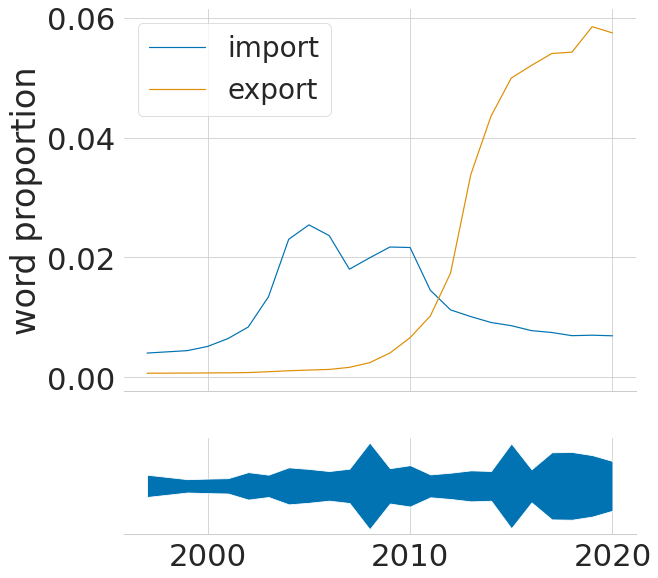

In [7]:
def plot_word_topic_evolution_ot(dfs, titles, figsize=None, save_path=None):
    if not figsize:
        fig = plt.figure(figsize=(len(dfs)*4,4))
    else:
        fig = plt.figure(figsize=figsize)
    plt.subplots_adjust(bottom=0.06, top=0.97, left=0.18, right=0.97)
    subfigs = fig.subfigures(1,len(dfs))
    sns.set_style("whitegrid")
    palette = sns.color_palette("colorblind")
    sns.set_theme(
        palette=palette, 
        style={'axes.spines.bottom': True,
                'axes.grid':True,
                'axes.spines.left': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'ytick.left': False,
                'figure.facecolor':'w'}, 
        context="paper",
        font_scale=3.5
    )
    if len(dfs) > 1:
        for i,df in enumerate(dfs):
            plot_word_ot_with_proportion(df, titles[i], subfigs[i])
    else:
        plot_word_ot_with_proportion(dfs[0], titles[0], subfigs)
#     fig.subplots_adjust(hspace=0.)
    if save_path:
        plt.savefig(save_path)

def single_topic_time_evolution(df, ax):
    ax.set_yticks([])
    x_domain = [x for x in range(1,len(df)+1)]
    x_labels = df.index.tolist()
    _max = max(df)
    assert len(x_domain) == len(x_labels)
#     plotter.set_xticks(x_domain)
#     plotter.set_xticklabels(x_labels)
#     max_val = 1 * df.max() + 5
    ax.fill_between(x_labels, df, -1*df, label="sup")
        
def plot_word_ot_with_proportion(df, title, fig):
    """This function should plot words over time for a particular topic in a DTM with
    that topic's proportional relevance underneath it. We also want to be able to 
    plot multiple of these in subplots.

    Args:
        df ([type]): The dataframe containing the relevant over time data, similar to plot_word_ot, as well
        as a column outlining the proportional relevance of the topic over time. These two sets of data should have the same time range.
        title ([type]): [description]
        save_path ([type], optional): [description]. Defaults to None.
    """
    ax0, ax1 = fig.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [4,1]})
#     ax1.set_xlabel('year')
    ax0.set_ylabel('word proportion')
    word_df = df.drop('_prop', axis='columns')
    prop_df = df['_prop']
    sns.lineplot(data=word_df, ax=ax0, dashes=False)
    ax0.legend(loc="upper left", fontsize="small")
    single_topic_time_evolution(prop_df, ax1)
plot_word_topic_evolution_ot([aeo_topic8_df], ["gg"], figsize=(9,8), save_path="../ALTA_results/words_over_time/aeo_topic8.png")

# AEO Topic Proportion Over Time

<module 'matplotlib.pyplot' from '/data/greyroads/energy-roadmap/env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

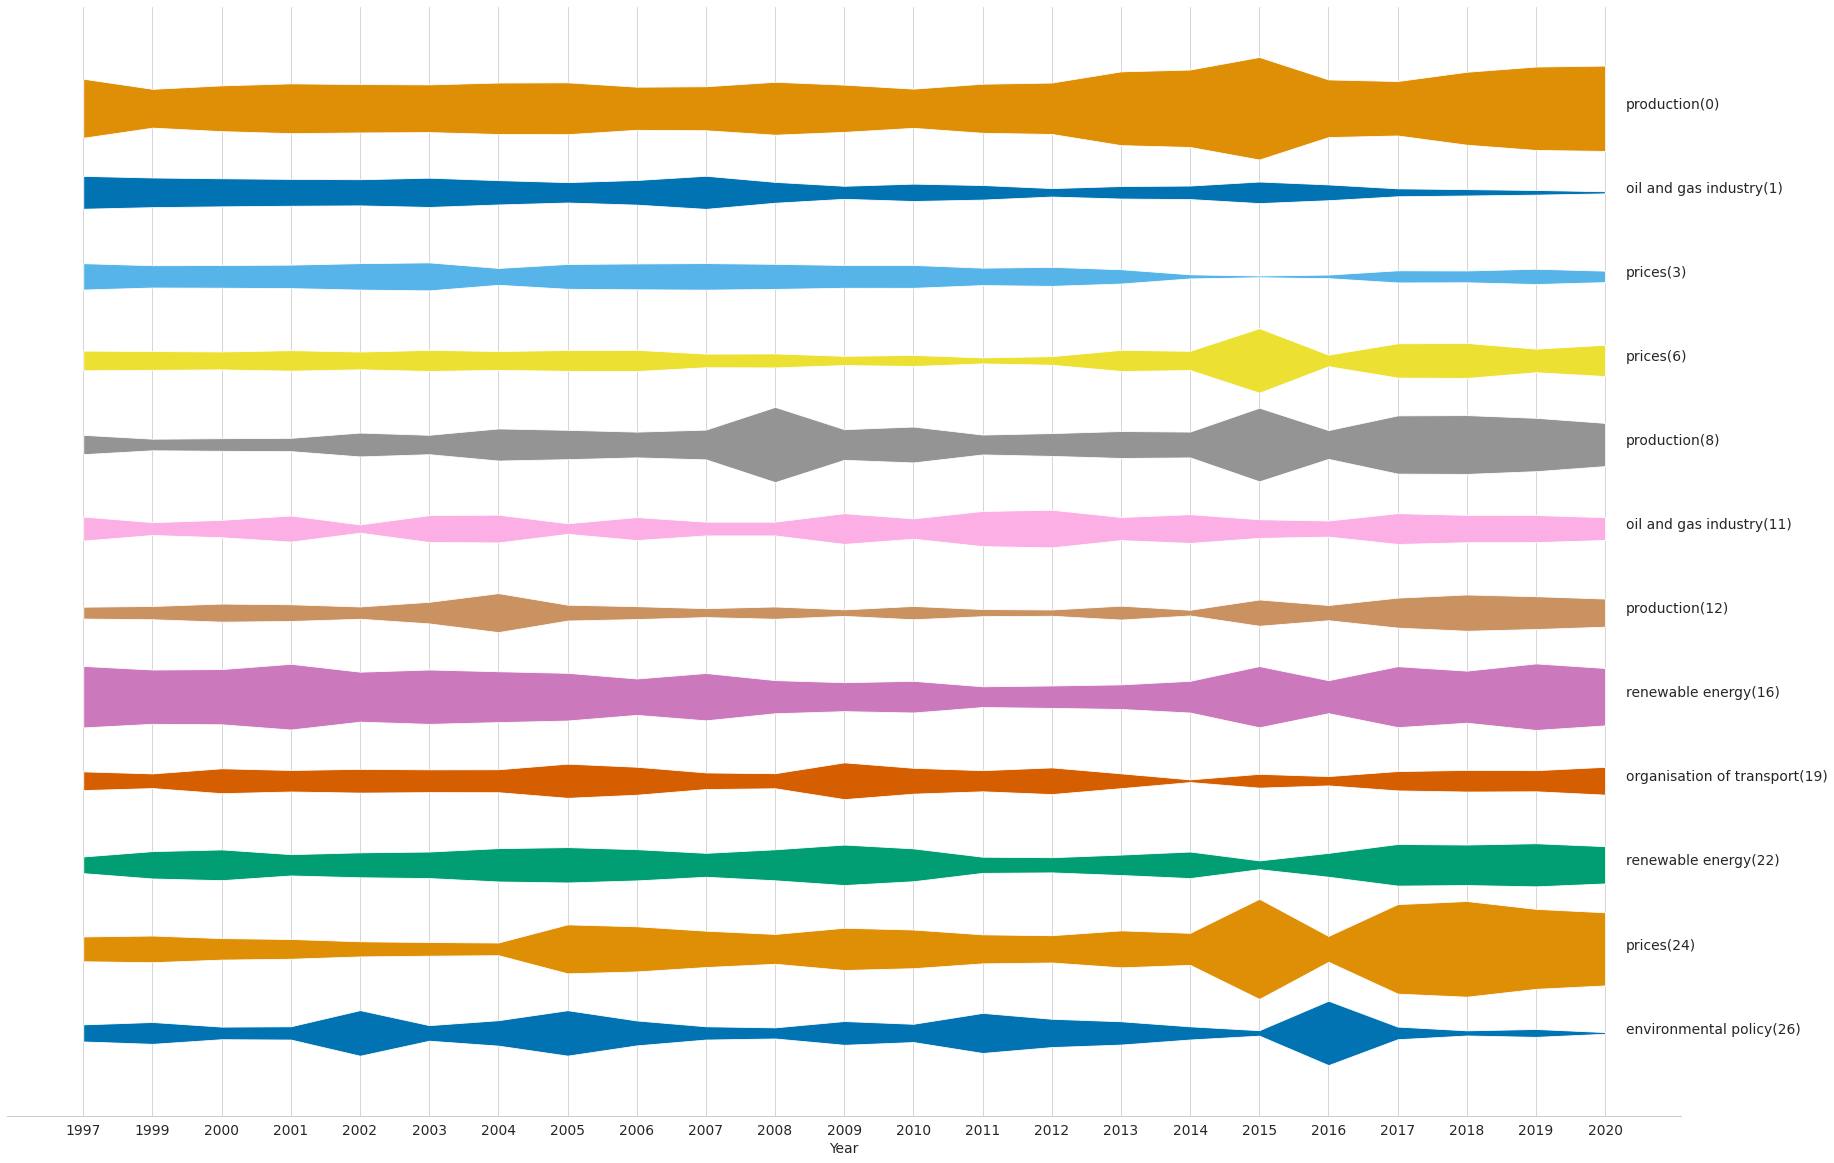

In [8]:
pd.set_option('max_columns', None)
# df = aeo_analysis.create_plottable_topic_proportion_ot_df(include_names=True, merge_topics=False)
keep = ["production(0)", "oil and gas industry(1)", "prices(3)", "prices(6)", "production(8)", "oil and gas industry(11)", "production(12)", "renewable energy(16)", "organisation of transport(19)", "renewable energy(22)", "prices(24)", "environmental policy(26)"]
aeo_analysis.plot_topics_ot(os.path.join(os.environ['ROADMAP_SCRAPER'], "figures", "aeo", "topics_ot.png"), keep=keep, include_names=True, scale=1.3)

In [9]:
def get_df(analysis, keep=None):
    df_scores = analysis.create_plottable_topic_proportion_ot_df(include_names=True, merge_topics=True, _type="embedding")
    for i in df_scores.index:
        df_scores.loc[i] = df_scores.loc[i] / df_scores.loc[i].sum() * 100
    sorted_selection = analysis._get_sorted_columns(df_scores, "col")
    if keep:
        df_scores = df_scores[sorted_selection].loc[:,[str(x) for x in keep]]
    else:
        df_scores = df_scores[sorted_selection]
    return df_scores

abbreviations = {"technology and technical regulations": "tech regulations",
                 "research and intellectual property": "research & ip",
                 "deterioration of the environment": "environmental damage",
                 "electrical and nuclear industries": "electr. & nuclear industry",
                 "business operations and trade": "business ops & trade",
                "electronics and electrical engineering": "electrical eng.",
                "executive power and public service": "government"}

label_filter = [
    "environmental damage",
    "electr. & nuclear industry",
    "government",
    "oil and gas industry",
    "prices",
    "renewable energy",
    "tech regulations",
    "business ops & trade"
]

df1 = get_df(aeo_analysis).rename(columns=abbreviations)
df2 = get_df(ieo_analysis).rename(columns=abbreviations)
df3 = get_df(journals_all_analysis).rename(columns=abbreviations)

In [6]:
from itertools import cycle
colour_mapping = [
    "accounting",
    "agricultural activity",
    "asia and oceania",
    "america",
    "building and public works",
    "business operations and trade",
    "chemistry",
    "coal and mining industries",
    "criminal law",
    "cultivation of agricultural land",
    "defence",
    "demography and population",
    "deterioration of the environment",
    "distributive trades",
    "economic analysis",
    "economic conditions",
    "electrical and nuclear industries",
    "electronics and electrical engineering",
    "environmental policy",
    "europe",
    "executive power and public service",
    "food technology",
    "humanities",
    "iron, steel and other metal industries",
    "land transport",
    "marketing",
    "mechanical engineering",
    "natural and applied sciences",
    "natural environment",
    "oil and gas industry",
    "organisation of transport",
    "prices",
    "production",
    "regions and regional policy",
    "renewable energy",
    "research and intellectual property",
    "taxation",
    "technology and technical regulations",
    "wood industry",
    "world organisations"
]
colour_mapping = [abbreviations[x] if x in abbreviations else x for x in colour_mapping]

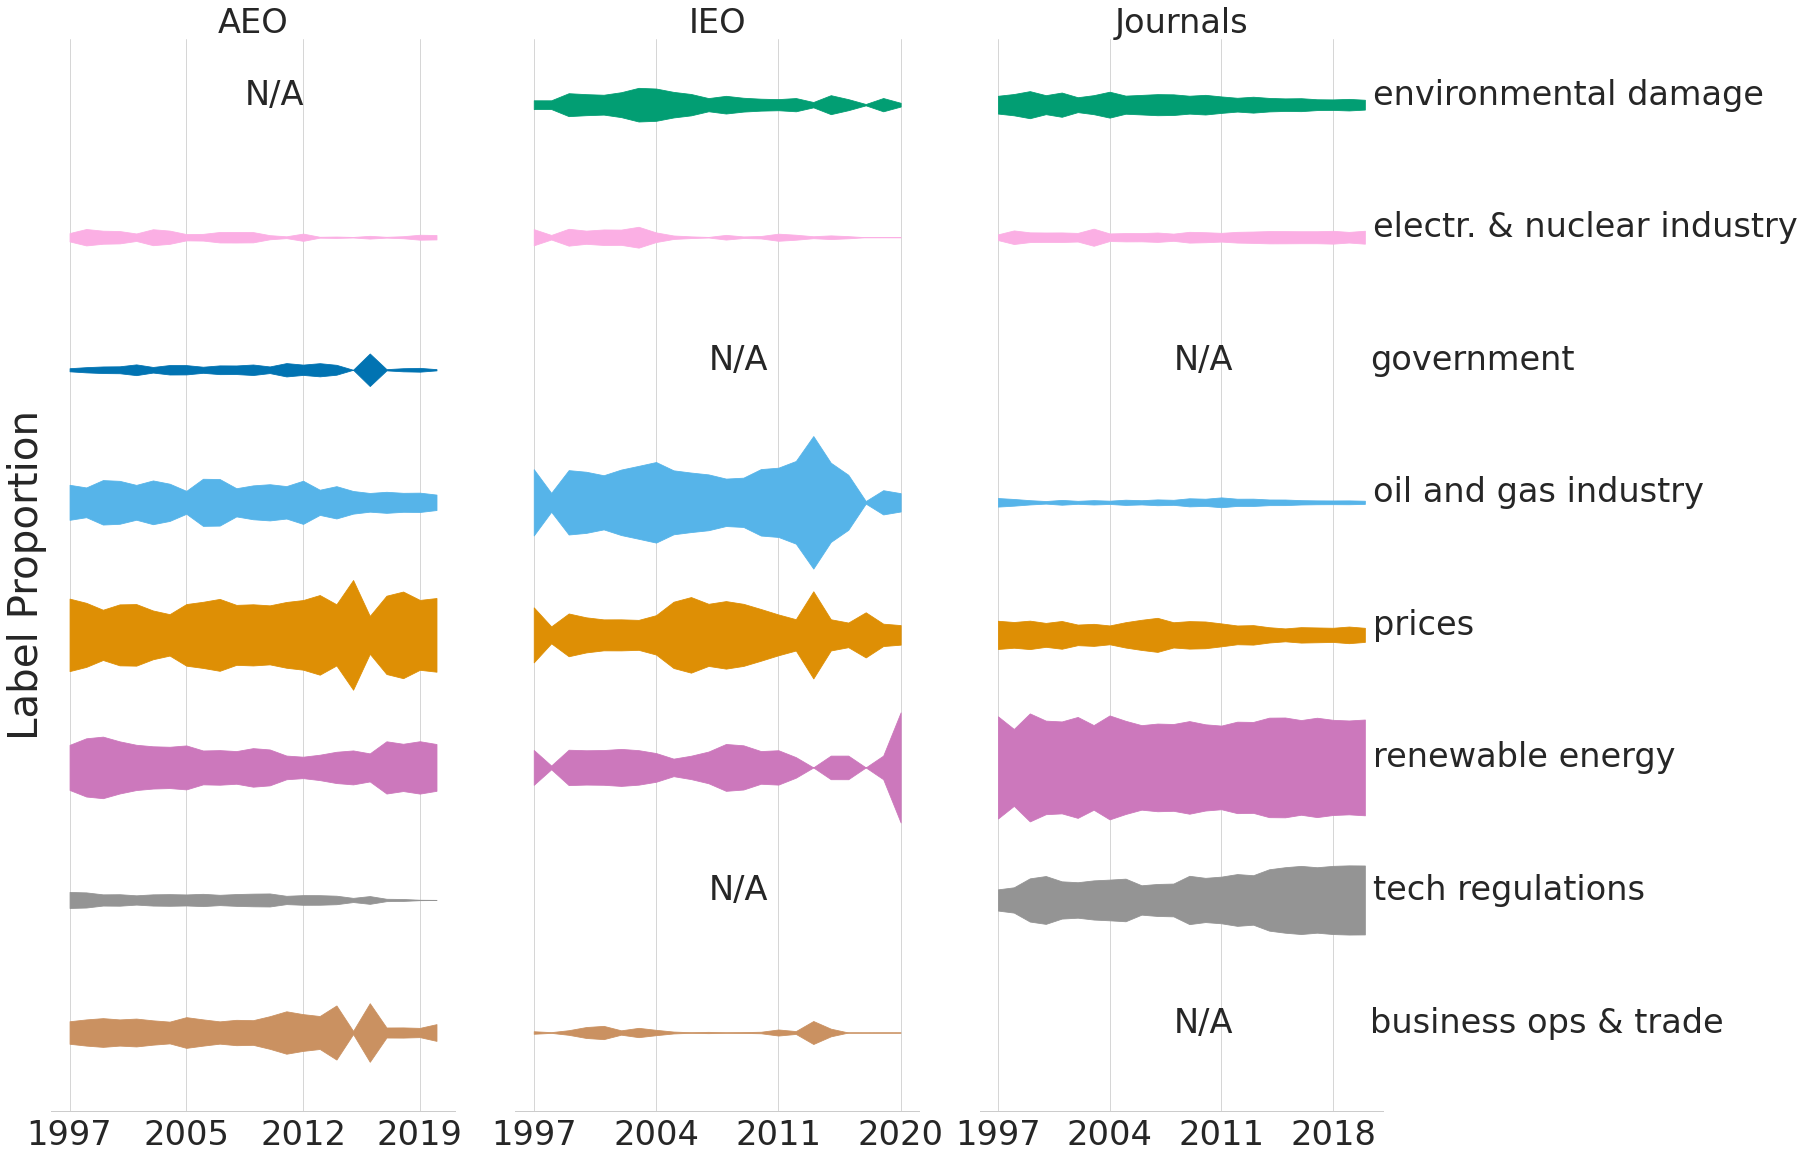

In [12]:
def time_evolution_plot(df, ax, filename, title=None, scale=1, save=True, use_colour_mapping=False, max_=None, show_labels=True, ylabel=False):
    """This function plots topic proportions over time. This function was adapted
    and is credited to the Muller-Hansen paper, the original code can be found in the
    following repository: https://github.com/mcc-apsis/coal-discourse.

    Args:
        df (pd.DataFrame): This is the dataframe that contains the data for plotting. The data should look
        similar to:
            topic_name          0         1        10  ...         7         8         9
            year                                       ...                              
            1997         1.388494  4.851258  0.682613  ...  2.151749  5.940288  5.549168
            1999         1.824987  4.308183  0.369598  ...  2.946666  4.397723  4.819061
            2000         2.007208  4.465947  0.954091  ...  7.107205  4.475813  5.143148
            2001         1.962062  5.138283  0.208519  ...  5.727354  4.850402  4.928038
            2002         2.296691  4.087264  1.247498  ...  5.597781  3.957320  5.775876
            2003         1.361571  3.489412  7.097156  ...  4.880698  3.832103  5.031273
            2004         2.264976  2.877810  4.056191  ...  3.253473  3.314512  4.896444
            2005         1.887321  3.466041  3.832519  ...  2.648234  4.212436  5.088535
            2006         1.456009  2.730801  2.910064  ...  3.306952  3.548342  5.672392
            2007         1.675358  2.575447  2.383468  ...  4.219317  3.666694  4.881267
            2008         1.786699  3.186896  1.782014  ...  2.834857  4.389405  6.141509
            2009         1.760088  3.462534  5.487852  ...  2.095825  3.013996  5.754901
        
            Where the columns represent the topics, each row a timestep and the cell values are the
            proportional relevance of a topic at a particular timestep.
            
        filename (str): Path which to save the plot figure to.
        title (str, optional): The title of the plot. Defaults to None.
        scale (int, optional): scale factor that dictates how fat the topic proportion representations are. 
            Defaults to 1.
        save (bool, optional): Whether or not to save the figure. Defaults to True.

    Returns:
        matplotlib plot object
    """
    # sns.set_context("talk")
    sns.set_style("whitegrid")
    palette = sns.color_palette("colorblind")
    sns.set_theme(
        palette=palette, 
        style={'axes.spines.bottom': True,
                'axes.grid':True,
                'axes.spines.left': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'ytick.left': False,
                'figure.facecolor':'w'}, 
        context="paper",
        font_scale=3.5
    )
    plt.yticks([])
    x_domain = [x for x in range(1,len(df)+1)]
    x_label_places = [x for x in range(1,len(df)+1)][::7]
#     x_label_places = [1, int(len(df) / 2), len(df)]
    x_labels = df.index.tolist()[::7]
#     x_labels = df.index.to_numpy()[[x-1 for x in x_label_places]]
#     assert len(x_domain) == len(x_labels)
    ax.set_xticks(x_label_places)
    ax.set_xticklabels(x_labels, fontsize="medium")
    if not max_:
        max_val = scale * df.max().max() + 5
    else:
        max_val = scale * max_
    for i, t in enumerate(reversed(df.columns)):
        if max(df[t]) == 0:
            ax.text(len(df) / 2 , (i+0.) *max_val, "N/A")
            if show_labels:
                ax.text(len(df) + 0.3, (i+0.) *max_val, t)
            continue
        if use_colour_mapping:
            ind = colour_mapping.index(t)
            count = 0
            for col in cycle(sns.color_palette("colorblind", as_cmap=True)):
                if count == ind:
                    colour = col
                    break
                count += 1
            ax.fill_between(x_domain, df[t] + i*max_val, i*max_val - df[t], label=t, color=colour)
        else:
            ax.fill_between(x_domain, df[t] + i*max_val, i*max_val - df[t], label=t)
        if show_labels:
            ax.text(len(df) + 0.5, (i+0.) *max_val, t)

#     ax.set_xlabel('Year', fontsize="x-large")
    if ylabel:
        ax.set_ylabel("Label Proportion", fontsize="large")
    if title:
        ax.set_title(title)
    return plt

# fig = plt.figure(figsize=(20,10))
def standardise_dfs(*dfs):
    all_topics = set()
    for i in range(len(dfs)):
        all_topics = all_topics.union(set(dfs[i].columns))
    for t in all_topics:
        for df in dfs:
            if t not in df.columns:
                df[t] = [0] * len(df)
    sorted_columns = sorted(dfs[0].columns)
    return [df[sorted_columns] for df in dfs]
df1, df2, df3 = standardise_dfs(df1, df2, df3)
df1 = df1.loc[:, label_filter]
df2 = df2.loc[:, label_filter]
df3 = df3.loc[:, label_filter]
fig = plt.figure(figsize=(25, 2*len(df1.columns)))
# fig.suptitle("Dicussion Comparison AEO vs IEO vs Journals", fontsize=24)
ax0, ax1, ax2 = fig.subplots(1,3, sharey=True)
max_ = max([df1.max().max(), df2.max().max(), df3.max().max()])
time_evolution_plot(df1, ax0, "", save=False, max_=max_, show_labels=False, title="AEO", use_colour_mapping=True, ylabel=True, scale=2)
time_evolution_plot(df2, ax1, "", save=False, max_=max_, show_labels=False, title="IEO", use_colour_mapping=True, ylabel=False, scale=2)
time_evolution_plot(df3, ax2, "", save=False, max_=max_, title="Journals", use_colour_mapping=True, ylabel=False, scale=2)
plt.subplots_adjust(wspace=0.15, left=0.03, right=0.77, top=0.97, bottom=0.04)
plt.savefig("../ALTA_results/embedding_threeway_sausage_merged_filtered.png")

In [50]:
df1.loc[:, ["deterioration of the environment"]]

KeyError: "None of [Index(['deterioration of the environment'], dtype='object', name='topic_name')] are in the [columns]"

In [91]:
journals_emb = journals_all_analysis.get_topic_names(_type="embedding", raw=True)
journals_tfidf = journals_all_analysis.get_topic_names(_type="tfidf", raw=True)
aeo_emb = aeo_analysis.get_topic_names(_type="embedding", raw=True)
aeo_tfidf = aeo_analysis.get_topic_names(_type="tfidf", raw=True)
ieo_emb = ieo_analysis.get_topic_names(_type="embedding", raw=True)
ieo_tfidf = ieo_analysis.get_topic_names(_type="tfidf", raw=True)

In [103]:
journals_topics = [0,4,22,28,29]
aeo_topics = [1,17,19,21,29]
ieo_topics = [5, 6, 9, 25, 27]
def _print(analysis, emb_topic_names, tfidf_topic_names, topics, filename):
    with open(filename, "w+") as fp:
        for topic in topics:
            top_words = [x for _,x in analysis.top_word_arr[topic]]
            emb = emb_topic_names[topic].most_common(4)
            tfidf = tfidf_topic_names[topic].most_common(4)
            for word in top_words:
                fp.write(f"{word}; ")
            fp.write("\nemb: ")
            for label, score in emb:
                fp.write(f"{label} ({round(score,2)}); ")
            fp.write("\ntfidf: ")
            for label, score in tfidf:
                fp.write(f"{label} ({round(score, 2)}); ")
            fp.write("\n\n")
_print(ieo_analysis, ieo_emb, ieo_tfidf, ieo_topics, "../ALTA_results/ieo_appendix.txt")

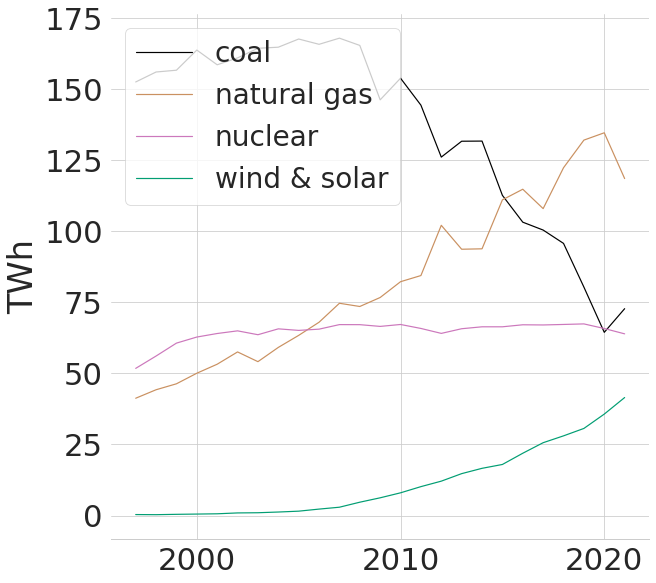

In [180]:
df = pd.read_csv("../ALTA_results/EIA_monthly_gen_selected_clean.csv", converters={"TWh": pd.to_numeric})
df['year'] = df['date'].apply(lambda x: int(x.split('-')[0]))
df1 = df.groupby(['year', 'technology']).mean('TWh')
df1 = df1.reset_index()
fig = plt.figure(figsize=(9,8))
sns.set_theme(
        palette=sns.color_palette("colorblind"), 
        style={'axes.spines.bottom': True,
                'axes.grid':True,
                'axes.spines.left': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'ytick.left': False,
                'figure.facecolor':'w'}, 
        context="paper",
        font_scale=3.5
    )
# fig.legend(fontsize="small")
plt.subplots_adjust(left=0.17, right=1, top=0.98, bottom=0.07)
lineplot = sns.lineplot(data=df1, x='year', y='TWh', hue='technology', palette=plt_colours)
lineplot.legend(fontsize="small")
lineplot.set_xlabel(None)
plt.savefig("../ALTA_results/eia_monthly_change.png")

In [170]:
sns.color_palette("colorblind")[8]
# nuclear = 4
# renewables = 2
# yellow = 8
# brown = 5

(0.9254901960784314, 0.8823529411764706, 0.2)

<module 'matplotlib.pyplot' from '/data/greyroads/energy-roadmap/env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

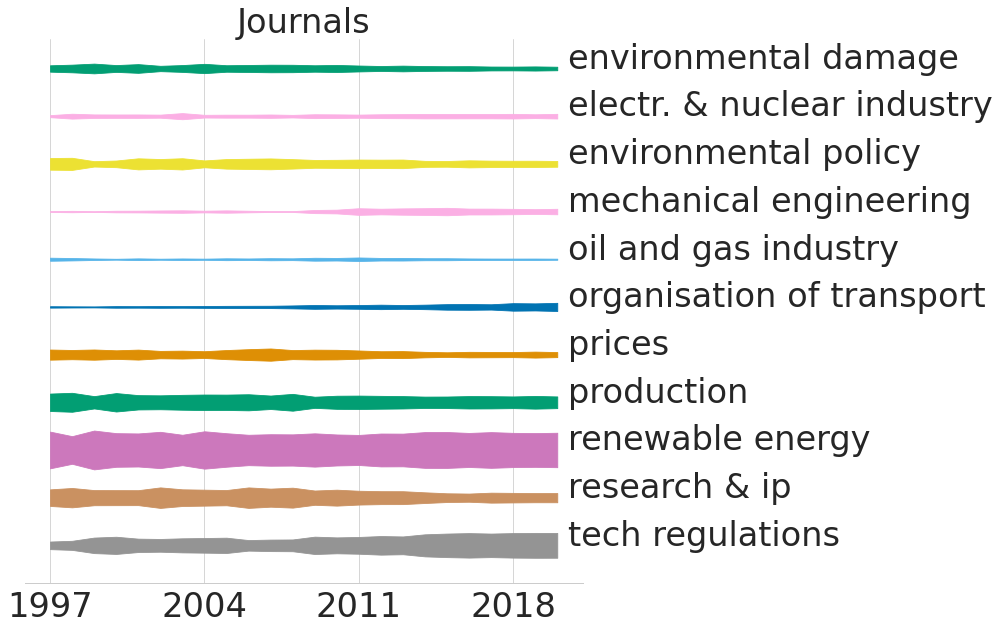

In [79]:
fig, ax = plt.subplots(figsize=(10,10))
time_evolution_plot(df3, ax, "", save=False, max_=max_, title="Journals", use_colour_mapping=True, ylabel=False, scale=2)

## Get words from a topic over time and plot the top 10 changing

In [3]:
word_dist_arr = journals_all_analysis.get_topic_word_distributions_ot(11)
tmp = journals_all_analysis.get_words_for_topic(word_dist_arr, with_prob=True, over_time=True, n=80)

In [4]:
journals_all_analysis.years.index(2020)
tmp[23]

[(0.1834142265531735, 'wind'),
 (0.05862878484860373, 'turbine'),
 (0.05490234364359234, 'wind_power'),
 (0.054512170301398495, 'farm'),
 (0.04051453050309795, 'speed'),
 (0.031695715842326756, 'wind_energy'),
 (0.027715519213122236, 'wake'),
 (0.026388495585819332, 'power'),
 (0.021887895063999047, 'high'),
 (0.020958821367923503, 'offshore'),
 (0.018576538613270424, 'increase'),
 (0.016448071632021676, 'large'),
 (0.01634825982923785, 'wave'),
 (0.015713452459565465, 'spatial'),
 (0.014934172888070254, 'location'),
 (0.012812313226724503, 'island'),
 (0.012150629424974543, 'area'),
 (0.011894496016886543, 'site'),
 (0.011702116624497582, 'datum'),
 (0.011448480119212807, 'study'),
 (0.011335613940894516, 'scale'),
 (0.010322641196931267, 'resource'),
 (0.009949855009906132, 'blade'),
 (0.009499802371983383, 'find'),
 (0.008904514096613175, 'low'),
 (0.00885236090153765, 'effect'),
 (0.008055471310120403, 'generation'),
 (0.00803875642906, 'result'),
 (0.007946676160119638, 'variabili